### **1. Import dataset and descriptors**

In [106]:
# Import tools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import std, mean
import scipy.stats as stats
from scipy.stats import normaltest
from scipy.stats import mannwhitneyu
from scipy.stats import kurtosis
from scipy.stats import skew

# Import feature selection algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold

# Import Classifiers
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

# Data splitting
from sklearn.model_selection import train_test_split

# Cross-validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# Model performance
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance

# Model performance metric
from sklearn.metrics import make_scorer

# PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA

In [107]:
! pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
# data sets import
url = pd.read_csv('https://raw.githubusercontent.com/GitGears/CYP/CYP_data/CYP279_steroidal.csv')
df = url.sort_values(by='ID', ascending=True)
df

,SMILES,ID,pIC50,class
0,CC(C1N=CC=N1)[C@H]1CCC2C3CCC4=CC(=O)CC[C@]4(C)...,CHEMBL112039,4.52,inactive
1,C[C@]12CCC3C(CC=C4CC(O)CC[C@@]43C)C1CCC2c1ccon1,CHEMBL113205,5.95,inactive
2,C[C@]12CCC3C(CCC4=CC(=O)CC[C@@]43C)C1CC[C@@H]2...,CHEMBL113407,6.40,intermediate
3,C[C@]12CCC3C(CCC4=CC(=O)CC[C@@]43C)C1CC=C2c1cc...,CHEMBL113448,7.23,active
4,C[C@]12CCC3C(CC=C4CC(O)CC[C@@]43C)C1CCC2c1ccno1,CHEMBL113804,6.82,intermediate
...,...,...,...,...
274,C[C@]12CCC3C(CC[C@H]4C[C@H](O)CC[C@]34C)C1CC=C...,CHEMBL79829,8.60,potent
275,CC(CCC(=O)OC1CC2CC=CC1C2)[C@H]1CCC2C3CC=C4C[C@...,CHEMBL80216,6.21,intermediate
276,C[C@]12CCC3C(CC=C4C[C@@H](O)CC[C@@]43C)C1CC=C2...,CHEMBL80388,5.85,inactive
277,C[C@]12CCC3C(CC=C4C[C@@H](O)CC[C@@]43C)C1CC[C@...,CHEMBL82926,7.64,active


In [109]:
# PubChem fingerprint
descriptors = pd.read_csv('https://raw.githubusercontent.com/GitGears/CYP/CYP_data/steroidal279-pc.csv')
df_pc=descriptors.sort_values(by='Name', ascending=True)

In [110]:
X_raw=df_pc.drop(['Name','Unnamed: 0'], axis=1)
Y_raw= df['class']

In [111]:
X_raw

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
275,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
276,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
277,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [112]:
Y_raw

0          inactive
1          inactive
2      intermediate
3            active
4      intermediate
           ...     
274          potent
275    intermediate
276        inactive
277          active
278          potent
Name: class, Length: 279, dtype: object

**Feature selection**

In [113]:
# remove low variance features

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X_lowvariance = remove_low_variance(X_raw, threshold=0.1)
X_lowvariance

,PubchemFP3,PubchemFP15,PubchemFP19,PubchemFP23,PubchemFP115,PubchemFP144,PubchemFP145,PubchemFP146,PubchemFP147,PubchemFP150,...,PubchemFP684,PubchemFP689,PubchemFP692,PubchemFP698,PubchemFP699,PubchemFP704,PubchemFP777,PubchemFP798,PubchemFP839,PubchemFP860
0,1,1,0,0,0,1,0,0,0,1,...,1,0,1,0,0,1,0,0,1,1
1,0,0,1,0,0,1,1,1,0,1,...,1,1,1,1,1,1,1,0,1,1
2,0,1,0,0,0,1,0,0,0,1,...,1,0,1,0,0,1,0,0,1,1
3,0,1,0,0,0,0,1,1,1,1,...,1,0,1,0,0,1,0,0,1,1
4,0,0,1,0,0,1,1,1,0,1,...,1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,1,0,1,1,1,1
275,1,0,1,0,0,1,0,0,0,1,...,1,1,1,1,1,1,1,0,1,1
276,0,1,0,0,0,0,1,1,1,1,...,0,1,0,1,1,0,1,0,0,0
277,1,0,0,0,0,1,0,0,0,0,...,0,1,0,1,1,0,1,0,1,1


In [114]:
# remove high collinerated features

corr_matrix = X_lowvariance.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

X_corr = X_lowvariance.drop(X_lowvariance[to_drop], axis=1)
X_corr

<ipython-input-114-79414be061ed>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,PubchemFP3,PubchemFP15,PubchemFP19,PubchemFP23,PubchemFP115,PubchemFP144,PubchemFP145,PubchemFP180,PubchemFP182,PubchemFP193,...,PubchemFP553,PubchemFP592,PubchemFP637,PubchemFP641,PubchemFP643,PubchemFP656,PubchemFP777,PubchemFP798,PubchemFP839,PubchemFP860
0,1,1,0,0,0,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,1
1,0,0,1,0,0,1,1,0,1,0,...,1,1,1,1,0,0,1,0,1,1
2,0,1,0,0,0,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,1
3,0,1,0,0,0,0,1,0,1,0,...,1,1,0,0,1,0,0,0,1,1
4,0,0,1,0,0,1,1,0,1,0,...,1,1,1,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,1,0,0,0,0,0,0,1,0,1,...,0,1,1,0,0,1,1,1,1,1
275,1,0,1,0,0,1,0,0,1,0,...,0,0,1,1,0,0,1,0,1,1
276,0,1,0,0,0,0,1,0,1,0,...,0,1,1,1,0,0,1,0,0,0
277,1,0,0,0,0,1,0,1,1,0,...,0,1,1,1,0,1,1,0,1,1


**Data balancing**

In [115]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy="not majority",random_state=42)

X_res, Y_res = ros.fit_resample(X_corr, Y_raw)

### **2. Modeling and validation**

**2.1 Data splitting**

In [116]:
#split dataset into training set and test set by 80/20 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size=0.2, random_state=42)

In [117]:
X_train.shape, X_test.shape

((358, 49), (90, 49))

In [118]:
Y_train.shape, Y_test.shape

((358,), (90,))

**2.2 Modeling with ET**

In [119]:
et = ExtraTreesClassifier(n_estimators=500, random_state=42)

# fit model
et.fit(X_train, Y_train)

# make predictions
Y_train_pred = et.predict(X_train)
Y_test_pred = et.predict(X_test)

#cross-validation
cv_scoring = {'acc': 'accuracy', 'rec': make_scorer(recall_score,average='weighted'), 'f1': make_scorer(f1_score, average='weighted'), 'MCC': make_scorer(matthews_corrcoef)}
clf_cv = et
cv = cross_validate(clf_cv, X_train, Y_train, cv=10, scoring=cv_scoring)

  # Calculating model performance
acc_train = accuracy_score(Y_train, Y_train_pred)
acc_test = accuracy_score(Y_test, Y_test_pred)
acc_cv = cv['test_acc'].mean()

rec_train = recall_score(Y_train, Y_train_pred, average='weighted')
rec_test = recall_score(Y_test, Y_test_pred, average='weighted')
rec_cv = cv['test_rec'].mean()

f1_train = f1_score(Y_train, Y_train_pred, average='weighted')
f1_test = f1_score(Y_test, Y_test_pred, average='weighted')
f1_cv = cv['test_f1'].mean()

mcc_train = matthews_corrcoef(Y_train, Y_train_pred)
mcc_test = matthews_corrcoef(Y_test, Y_test_pred)
mcc_cv = cv['test_MCC'].mean()
  
  # Preparing performance summary table
model_name = pd.Series([et], name='Algorithm')

acc_train_series = pd.Series(acc_train, name='acc_train')
acc_test_series = pd.Series(acc_test, name='acc_test')
acc_cv_series = pd.Series(acc_cv, name='acc_cv')

rec_train_series = pd.Series(rec_train, name='rec_train')
rec_test_series = pd.Series(rec_test, name='rec_test')
rec_cv_series = pd.Series(rec_cv, name='rec_cv')

f1_train_series = pd.Series(f1_train, name='f1_train')
f1_test_series = pd.Series(f1_test, name='f1_test')
f1_cv_series = pd.Series(f1_cv, name='f1_cv')

mcc_train_series = pd.Series(mcc_train, name='MCC_train')
mcc_cv_series = pd.Series(mcc_cv, name='MCC_cv')
mcc_test_series = pd.Series(mcc_test, name='MCC_test')

performance_metrics = pd.concat([model_name,
                                   acc_train_series, acc_cv_series, acc_test_series,
                                   rec_train_series, rec_cv_series, rec_test_series,
                                   f1_train_series, f1_cv_series, f1_test_series,
                                   mcc_train_series, mcc_cv_series, mcc_test_series], axis=1)

performance_metrics['acc_train-cv'] = abs(performance_metrics['acc_train'] - performance_metrics['acc_cv'])
performance_metrics['acc_train-test'] = abs(performance_metrics['acc_train'] - performance_metrics['acc_test'])

performance_metrics['rec_train-cv'] = abs(performance_metrics['rec_train'] - performance_metrics['rec_cv'])
performance_metrics['rec_train-test'] = abs(performance_metrics['rec_train'] - performance_metrics['rec_test'])

performance_metrics['f1_train-cv'] = abs(performance_metrics['f1_train'] - performance_metrics['f1_cv'])
performance_metrics['f1_train-test'] = abs(performance_metrics['f1_train'] - performance_metrics['f1_test'])

performance_metrics['MCC_train-cv'] = abs(performance_metrics['MCC_train'] - performance_metrics['MCC_cv'])
performance_metrics['MCC_train-test'] = abs(performance_metrics['MCC_train'] - performance_metrics['MCC_test'])

performance_metrics

df_et = performance_metrics
df_et

,Algorithm,acc_train,acc_cv,acc_test,rec_train,rec_cv,rec_test,f1_train,f1_cv,f1_test,...,MCC_cv,MCC_test,acc_train-cv,acc_train-test,rec_train-cv,rec_train-test,f1_train-cv,f1_train-test,MCC_train-cv,MCC_train-test
0,"(ExtraTreeClassifier(random_state=1608637542),...",0.932961,0.818413,0.833333,0.932961,0.818413,0.833333,0.932831,0.813664,0.828983,...,0.765983,0.784378,0.114548,0.099628,0.114548,0.099628,0.119167,0.103848,0.145476,0.127081


**2.3 Confusion matrix**

In [120]:
cm1 = confusion_matrix(Y_train,Y_train_pred, labels=['potent', 'active', 'intermediate', 'inactive'])
cm2 = confusion_matrix(Y_test,Y_test_pred, labels=['potent', 'active', 'intermediate', 'inactive'])

In [121]:
accuracy_score(Y_train, Y_train_pred)

0.9329608938547486

In [122]:
recall_score(Y_train, Y_train_pred, average='micro')

0.9329608938547486

In [123]:
recall_score(Y_train, Y_train_pred, average='macro')

0.9319980857283287

In [124]:
recall_score(Y_train, Y_train_pred, average='weighted')

0.9329608938547486

In [125]:
# classification report

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Y_train, Y_train_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(Y_train, Y_train_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_train, Y_train_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(Y_train, Y_train_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(Y_train, Y_train_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(Y_train, Y_train_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(Y_train, Y_train_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(Y_train, Y_train_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(Y_train, Y_train_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(Y_train, Y_train_pred, average='weighted')))

print('\nClassification Report\n')
print(classification_report(Y_train, Y_train_pred, target_names=['potent', 'active', 'intermediate', 'inactive']))


Accuracy: 0.93

Micro Precision: 0.93
Micro Recall: 0.93
Micro F1-score: 0.93

Macro Precision: 0.94
Macro Recall: 0.93
Macro F1-score: 0.93

Weighted Precision: 0.94
Weighted Recall: 0.93
Weighted F1-score: 0.93

Classification Report

              precision    recall  f1-score   support

      potent       0.88      1.00      0.94        92
      active       0.98      0.92      0.95        87
intermediate       0.93      0.88      0.90        86
    inactive       0.96      0.92      0.94        93

    accuracy                           0.93       358
   macro avg       0.94      0.93      0.93       358
weighted avg       0.94      0.93      0.93       358



In [126]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Y_test, Y_test_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(Y_test, Y_test_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, Y_test_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(Y_test, Y_test_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(Y_test, Y_test_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(Y_test, Y_test_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(Y_test, Y_test_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(Y_test, Y_test_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(Y_test, Y_test_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(Y_test, Y_test_pred, average='weighted')))

print('\nClassification Report\n')
print(classification_report(Y_test, Y_test_pred, target_names=['potent', 'active', 'intermediate', 'inactive']))


Accuracy: 0.83

Micro Precision: 0.83
Micro Recall: 0.83
Micro F1-score: 0.83

Macro Precision: 0.85
Macro Recall: 0.85
Macro F1-score: 0.84

Weighted Precision: 0.85
Weighted Recall: 0.83
Weighted F1-score: 0.83

Classification Report

              precision    recall  f1-score   support

      potent       0.74      1.00      0.85        20
      active       0.81      0.88      0.85        25
intermediate       0.84      0.62      0.71        26
    inactive       1.00      0.89      0.94        19

    accuracy                           0.83        90
   macro avg       0.85      0.85      0.84        90
weighted avg       0.85      0.83      0.83        90



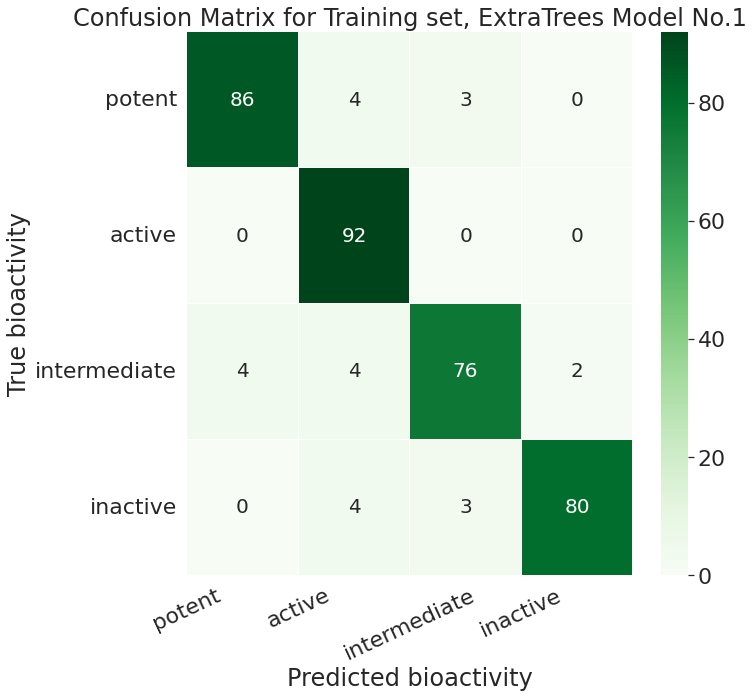

In [127]:
# Build the plot
plt.figure(figsize=(10,10))
sns.set(font_scale=2)
sns.heatmap(cm1, annot=True, annot_kws={'size':20},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['potent', 'active', 'intermediate', 'inactive']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted bioactivity')
plt.ylabel('True bioactivity')
plt.title('Confusion Matrix for Training set, ExtraTrees Model No.1')
plt.show()

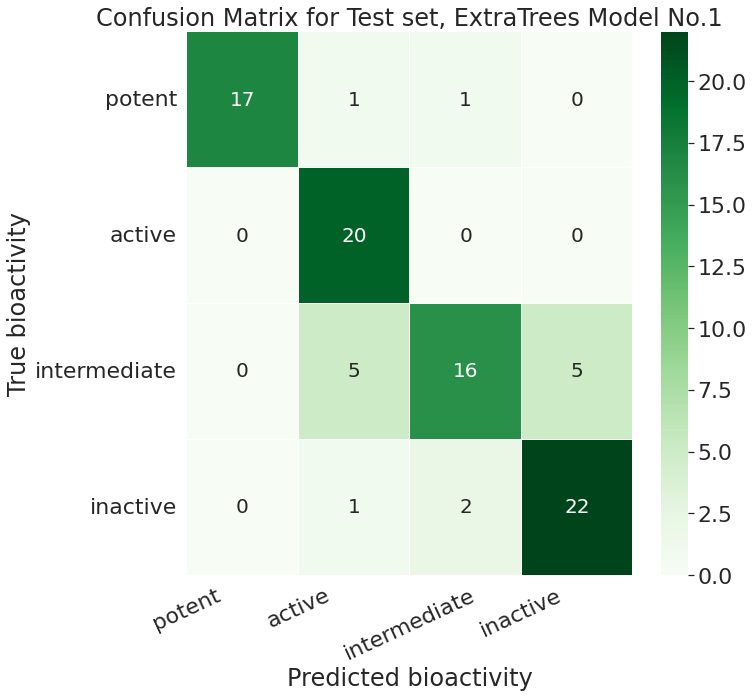

In [128]:
# Build the plot
plt.figure(figsize=(10,10))
sns.set(font_scale=2)
sns.heatmap(cm2, annot=True, annot_kws={'size':20},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['potent', 'active', 'intermediate', 'inactive']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted bioactivity')
plt.ylabel('True bioactivity')
plt.title('Confusion Matrix for Test set, ExtraTrees Model No.1')
plt.show()

In [129]:
def _report(TN, FP, FN, TP):
    TPR = TP/(TP+FN) if (TP+FN)!=0 else 0
    TNR = TN/(TN+FP) if (TN+FP)!=0 else 0
    PPV = TP/(TP+FP) if (TP+FP)!=0 else 0
    report = {'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 
              'TPR': TPR, 'Recall': TPR, 'Sensitivity': TPR,
              'TNR' : TNR, 'Specificity': TNR,
              'FPR': FP/(FP+TN) if (FP+TN)!=0 else 0,
              'FNR': FN/(FN+TP) if (FN+TP)!=0 else 0,
              'PPV': PPV, 'Precision': PPV,
              'F1 Score': 2*(PPV*TPR)/(PPV+TPR)
             }
    return report

def multi_classification_report(Y_train, Y_train_pred,labels=None, encoded_labels=True, as_frame=True):
    
    from sklearn.metrics import multilabel_confusion_matrix
    
    conf_labels = None if encoded_labels else labels
    
    conf_mat = multilabel_confusion_matrix(Y_train, Y_train_pred,labels=['potent', 'active', 'intermediate', 'inactive'])
    report = dict()
    if labels == None:
        counter = np.arange(len(conf_mat))
    else:
        counter = labels
        
    for i, name in enumerate(counter):
        TN, FP, FN, TP = conf_mat[i].ravel()
        report[name] = _report(TN, FP, FN, TP)
    
    if as_frame:
        return pd.DataFrame(report)
    return report

In [130]:
multi_classification_report(Y_train, Y_train_pred, labels=['potent', 'active', 'intermediate', 'inactive'], encoded_labels=True, as_frame=True)

,potent,active,intermediate,inactive
TP,86.000000,92.000000,76.000000,80.000000
TN,261.000000,254.000000,266.000000,269.000000
FP,4.000000,12.000000,6.000000,2.000000
FN,7.000000,0.000000,10.000000,7.000000
TPR,0.924731,1.000000,0.883721,0.919540
Recall,0.924731,1.000000,0.883721,0.919540
Sensitivity,0.924731,1.000000,0.883721,0.919540
TNR,0.984906,0.954887,0.977941,0.992620
Specificity,0.984906,0.954887,0.977941,0.992620
FPR,0.015094,0.045113,0.022059,0.007380


In [131]:
multi_classification_report(Y_test, Y_test_pred, labels=['potent', 'active', 'intermediate', 'inactive'], encoded_labels=True, as_frame=True)

,potent,active,intermediate,inactive
TP,17.000000,20.000000,16.000000,22.000000
TN,71.000000,63.000000,61.000000,60.000000
FP,0.000000,7.000000,3.000000,5.000000
FN,2.000000,0.000000,10.000000,3.000000
TPR,0.894737,1.000000,0.615385,0.880000
Recall,0.894737,1.000000,0.615385,0.880000
Sensitivity,0.894737,1.000000,0.615385,0.880000
TNR,1.000000,0.900000,0.953125,0.923077
Specificity,1.000000,0.900000,0.953125,0.923077
FPR,0.000000,0.100000,0.046875,0.076923
